In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/8/data/AMZN

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/8/data/AMZN


In [3]:
import pandas as pd
data=pd.read_csv('AMZN.csv', header=0,index_col="Date")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2019-04-29 to 2020-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


             Open        High         Low       Close   Adj Close      Volume
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000
mean     0.000780    0.000767    0.000698    0.000703    0.000703    0.001060
std      0.020953    0.016475    0.017950    0.019115    0.019115    0.346114
min     -0.075945   -0.058493   -0.072806   -0.082535   -0.082535   -0.970373
25%     -0.009434   -0.006898   -0.007456   -0.008123   -0.008123   -0.217729
50%      0.001216   -0.000071    0.000985    0.000533    0.000533   -0.033836
75%      0.010245    0.007008    0.008255    0.008820    0.008820    0.183968
max      0.099056    0.093154    0.078766    0.071196    0.071196    1.919016


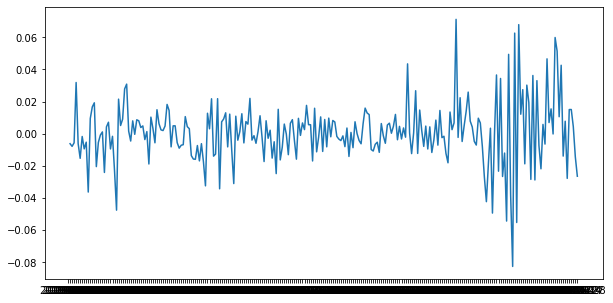

In [5]:
import numpy as np
import matplotlib.pyplot as plt
datapct=data.pct_change() # ( y_t - y_{t-1} ) / y_{t-1} 임.
logreturn=np.log(1+datapct) # 즉, 이게 로그리턴임.
logreturn.head()
print(logreturn.describe())
plt.figure(figsize=(10,5))
plt.plot(logreturn['Close']) 
plt.show()
# 이렇게 막 흔들려야함. 이게 stationary. 막 위아래로, 0중심에서 진동해야함.

In [6]:
from statsmodels.tsa.stattools import adfuller
logreturn=logreturn.dropna() 
# missing 제거 (차분을 했기 때문에 생긴다. : y_1 - y_0 를 할때, 뺄수가 없음.)
# y_0가 없기 떄문. 따라서 dropna()진행.

result=adfuller(logreturn['Close'])
print(result)
# p- : 0.000117 -> H_0 기각

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-4.622864119130806, 0.0001171991981366725, 8, 243, {'1%': -3.4575505077947746, '5%': -2.8735087323013526, '10%': -2.573148434859185}, -1214.5249819073765)


In [7]:
# y1 ~ y24 -> y25
# y2 ~ y25 -> y26 ... 가 되도록 만들어야함.

# 253개에서, 차분했기 때문에 252개의 데이터를 가지고 있음.

logr1=logreturn['Close'].values
print(type(logr1))
print(logr1.shape)
logr=logr1.reshape(1,-1)
print(logr.shape)
inte=24
x=[]
y=[]
for i in range(logr.shape[1]):
    if i+inte>logr.shape[1]-1:
        break
    else:
         xx=logr[0,i:i+inte]
         x.append(xx)
         yy=logr[0,i+inte]
         y.append(yy)
print(type(x))
print(type(y))
x=np.asarray(x)
y=np.asarray(y)
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
x_train=x[:210]
x_test=x[210:]
y_train=y[:210]
y_test=y[210:] #18개를 썻는데 좀더 줄일필요는 있다.

#주의해야한다. split을 해서 데이터를 쪼개면 안됨. 우리는 순서가 중요하기때문에 그렇다.

<class 'numpy.ndarray'>
(252,)
(1, 252)
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(228, 24)
(228,)


In [0]:
# 0.1

In [26]:
x_train=x_train.reshape(-1,1,24)
x_test=x_test.reshape(-1,1,24)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=3)

model=Sequential()
model.add(LSTM(32, input_shape=(1,24), kernel_regularizer=l1(0.1)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

los_test=model.evaluate(x_test,y_test)

print(los_test)

Epoch 1/100
6/6 [==============================] - 0s 56ms/step - loss: 572.2474 - mae: 0.0105 - val_loss: 536.3029 - val_mae: 0.0269
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 517.7911 - mae: 0.0100 - val_loss: 493.7596 - val_mae: 0.0265
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 478.3545 - mae: 0.0102 - val_loss: 457.6102 - val_mae: 0.0265
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 443.7006 - mae: 0.0101 - val_loss: 424.6755 - val_mae: 0.0265
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 411.6820 - mae: 0.0099 - val_loss: 393.8187 - val_mae: 0.0267
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 381.5157 - mae: 0.0100 - val_loss: 364.5101 - val_mae: 0.0263
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 352.7577 - mae: 0.0097 - val_loss: 336.4994 - val_mae: 0.0263
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - los

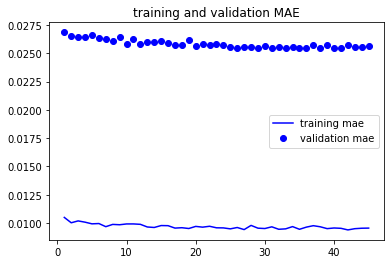

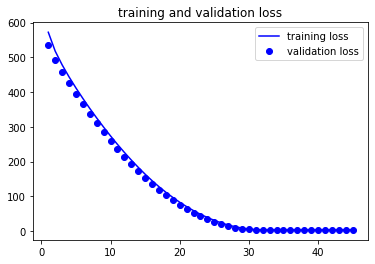

In [27]:
import matplotlib.pyplot as plt
acc=history.history['mae']
val_acc=history.history['val_mae']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training mae')
plt.plot(epochs,val_acc,'bo',label='validation mae')
plt.title('training and validation MAE')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
# 0.01

In [17]:
x_train=x_train.reshape(-1,1,24)
x_test=x_test.reshape(-1,1,24)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
from tensorflow.keras.regularizers import l1

model=Sequential()
model.add(LSTM(32, input_shape=(1,24), kernel_regularizer=l1(0.01)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

los_test=model.evaluate(x_test,y_test)

print(los_test)

Epoch 1/100
6/6 [==============================] - 0s 58ms/step - loss: 2.9070 - mae: 0.0100 - val_loss: 2.7265 - val_mae: 0.0241
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 2.6320 - mae: 0.0092 - val_loss: 2.5108 - val_mae: 0.0244
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 2.4318 - mae: 0.0096 - val_loss: 2.3274 - val_mae: 0.0242
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 2.2561 - mae: 0.0093 - val_loss: 2.1605 - val_mae: 0.0248
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 2.0938 - mae: 0.0095 - val_loss: 2.0040 - val_mae: 0.0246
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 1.9407 - mae: 0.0096 - val_loss: 1.8550 - val_mae: 0.0255
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 1.7942 - mae: 0.0101 - val_loss: 1.7120 - val_mae: 0.0247
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 1.6540 - mae: 0.0093 - va

In [0]:
import matplotlib.pyplot as plt
acc=history.history['mae']
val_acc=history.history['val_mae']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training mae')
plt.plot(epochs,val_acc,'bo',label='validation mae')
plt.title('training and validation MAE')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
# 0.001

In [18]:
x_train=x_train.reshape(-1,1,24)
x_test=x_test.reshape(-1,1,24)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
from tensorflow.keras.regularizers import l1

model=Sequential()
model.add(LSTM(32, input_shape=(1,24), kernel_regularizer=l1(0.001)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

los_test=model.evaluate(x_test,y_test)

print(los_test)

Epoch 1/100
6/6 [==============================] - 0s 59ms/step - loss: 0.2878 - mae: 0.0105 - val_loss: 0.2705 - val_mae: 0.0241
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.2606 - mae: 0.0098 - val_loss: 0.2492 - val_mae: 0.0242
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2409 - mae: 0.0099 - val_loss: 0.2313 - val_mae: 0.0244
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2237 - mae: 0.0098 - val_loss: 0.2149 - val_mae: 0.0249
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2077 - mae: 0.0098 - val_loss: 0.1994 - val_mae: 0.0247
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1926 - mae: 0.0101 - val_loss: 0.1848 - val_mae: 0.0248
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1782 - mae: 0.0097 - val_loss: 0.1708 - val_mae: 0.0249
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1644 - mae: 0.0096 - va

In [0]:
import matplotlib.pyplot as plt
acc=history.history['mae']
val_acc=history.history['val_mae']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training mae')
plt.plot(epochs,val_acc,'bo',label='validation mae')
plt.title('training and validation MAE')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [0]:
# 0.0001

In [22]:
x_train=x_train.reshape(-1,1,24)
x_test=x_test.reshape(-1,1,24)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
from tensorflow.keras.regularizers import l1

model=Sequential()
model.add(LSTM(32, input_shape=(1,24), kernel_regularizer=l1(0.0001)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

los_test=model.evaluate(x_test,y_test)

print(los_test)

Epoch 1/100
6/6 [==============================] - 0s 57ms/step - loss: 0.0288 - mae: 0.0107 - val_loss: 0.0277 - val_mae: 0.0259
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0260 - mae: 0.0100 - val_loss: 0.0255 - val_mae: 0.0254
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0240 - mae: 0.0100 - val_loss: 0.0237 - val_mae: 0.0254
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0223 - mae: 0.0100 - val_loss: 0.0220 - val_mae: 0.0255
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0207 - mae: 0.0096 - val_loss: 0.0205 - val_mae: 0.0262
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0191 - mae: 0.0099 - val_loss: 0.0190 - val_mae: 0.0261
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0177 - mae: 0.0098 - val_loss: 0.0176 - val_mae: 0.0252
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0164 - mae: 0.0098 - va

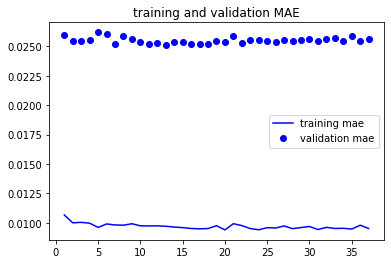

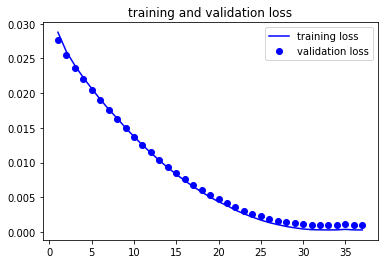

In [23]:
import matplotlib.pyplot as plt
acc=history.history['mae']
val_acc=history.history['val_mae']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training mae')
plt.plot(epochs,val_acc,'bo',label='validation mae')
plt.title('training and validation MAE')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()